<a href="https://colab.research.google.com/github/chunyuan0221/3rd-ML100days/blob/master/Day_082_Dropout_with_different_value%26optimizer_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
def build_mlp(input_shape, output_neuron=10, layer_neuron=[512, 256, 128], drop_value=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(shape=input_shape)
    for i, neuron in enumerate(layer_neuron):
        if i == 0:
            x = keras.layers.Dense(units=neuron, 
                                   activation='relu',
                                   name='hidden_layer%s' %(i+1))(input_layer)
            x = keras.layers.Dropout(drop_value)(x)
        else:
            x = keras.layers.Dense(units=neuron, 
                                   activation='relu',
                                   name='hidden_layer%s' %(i+1))(x)
            x = keras.layers.Dropout(drop_value)(x)
    
    out_layer = keras.layers.Dense(units=output_neuron, activation='softmax')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out_layer])
    return model

In [0]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
drop = 0.25

In [7]:
#results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:], drop_value=drop)
model.summary()
opt = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_data=(x_test, y_test),
          shuffle=True)

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0   

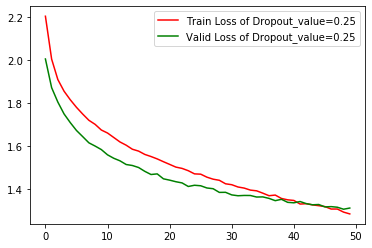

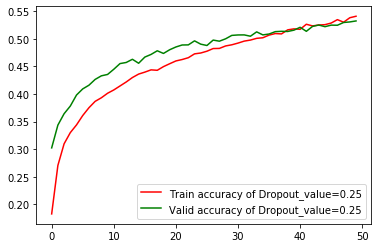

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
plt.plot(train_loss, '-', color='r', label='Train Loss of Dropout_value=%s'%drop)
plt.plot(valid_loss, '-', color='g', label='Valid Loss of Dropout_value=%s'%drop)
plt.legend()
plt.show()

plt.plot(train_acc, '-', color='r', label='Train accuracy of Dropout_value=%s'%drop)
plt.plot(valid_acc, '-', color='g', label='Valid accuracy of Dropout_value=%s'%drop)
plt.legend()
plt.show()

In [9]:
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
keras.backend.clear_session()
model = build_mlp(input_shape=x_train.shape[1:], drop_value=drop)
model.summary()
#opt = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_data=(x_test, y_test),
          shuffle=True)

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0   

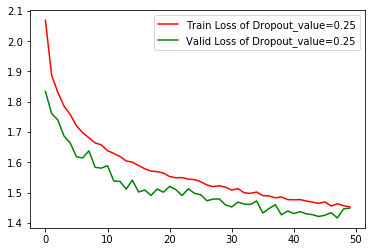

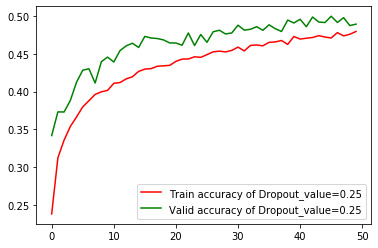

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
plt.plot(train_loss, '-', color='r', label='Train Loss of Dropout_value=%s'%drop)
plt.plot(valid_loss, '-', color='g', label='Valid Loss of Dropout_value=%s'%drop)
plt.legend()
plt.show()

plt.plot(train_acc, '-', color='r', label='Train accuracy of Dropout_value=%s'%drop)
plt.plot(valid_acc, '-', color='g', label='Valid accuracy of Dropout_value=%s'%drop)
plt.legend()
plt.show()

#### Chage hyper-parameter
***
- drop=0.35

In [0]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
drop = 0.35

In [16]:
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
keras.backend.clear_session()
model = build_mlp(input_shape=x_train.shape[1:], drop_value=drop)
model.summary()
opt = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_data=(x_test, y_test),
          shuffle=True)

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0   

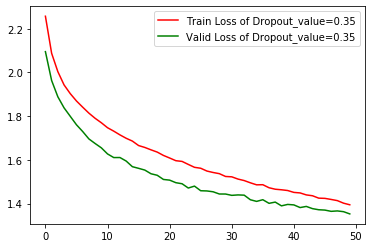

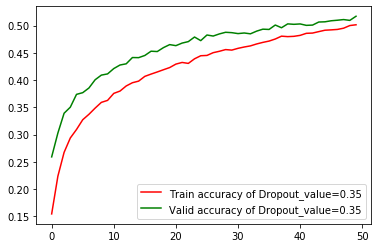

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
plt.plot(train_loss, '-', color='r', label='Train Loss of Dropout_value=%s'%drop)
plt.plot(valid_loss, '-', color='g', label='Valid Loss of Dropout_value=%s'%drop)
plt.legend()
plt.show()

plt.plot(train_acc, '-', color='r', label='Train accuracy of Dropout_value=%s'%drop)
plt.plot(valid_acc, '-', color='g', label='Valid accuracy of Dropout_value=%s'%drop)
plt.legend()
plt.show()

In [14]:
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
keras.backend.clear_session()
model = build_mlp(input_shape=x_train.shape[1:], drop_value=drop)
model.summary()
#opt = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_data=(x_test, y_test),
          shuffle=True)

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0   

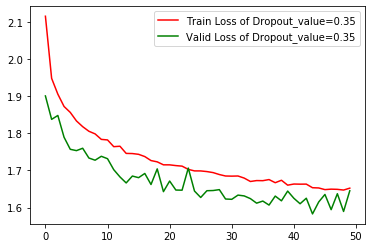

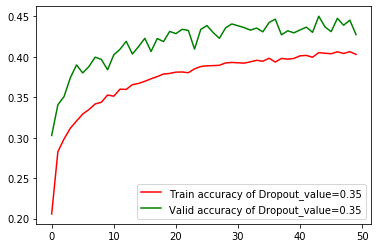

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
plt.plot(train_loss, '-', color='r', label='Train Loss of Dropout_value=%s'%drop)
plt.plot(valid_loss, '-', color='g', label='Valid Loss of Dropout_value=%s'%drop)
plt.legend()
plt.show()

plt.plot(train_acc, '-', color='r', label='Train accuracy of Dropout_value=%s'%drop)
plt.plot(valid_acc, '-', color='g', label='Valid accuracy of Dropout_value=%s'%drop)
plt.legend()
plt.show()

### Result
***
- 我們分別執行了4種結果:
  1. dropout=0.25, optimizer=SGD
  2. dropout=0.35, optimizer=SGD
  3. dropout=0.25, optimizer=Adam
  4. dropout=0.35, optimizer=Adam
- 第1、2和3、4兩組分別測試了在不同dropout的結果:
  1. 我們發現不管是哪種optimizer，Dropout=0.25的擬合結果比Dropout=0.35來的好
  2. Dropout=0.35時，丟棄的權重太多，因此model的擬合結果整體下滑太多

- 第1、3和2、4兩組分別測試了在不同optimizer會有什麼樣的變化:
  1. 我們發現不管dropout值怎麼改變，SGD在擬合結果上都比Adam來的平滑穩定。

- 因此，經過這次測試可以找到較佳的hyper parameter:
  1. dropout=0.25
  2. optimizer=SGD